<a href="https://colab.research.google.com/github/ReubenCode/TensorFlow/blob/main/02_neural_netwok_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to neural network classification with TensorFLow

in this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification


Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

#make 1000 examples
n_samples = 1000

# Create circles

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
# check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# change the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is alittle hard to understand right now lets visualize it!

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


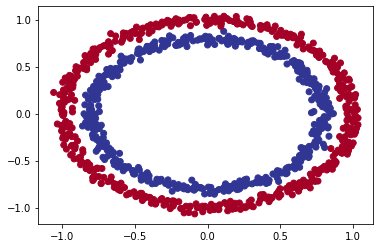

In [5]:
# visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [6]:
# chek the shapes of or features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [8]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## steps in modeling

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [9]:
import tensorflow as tf


In [10]:


# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),

])
# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [11]:
# let's try to improve our model by training for longer.
model_1.fit(X, y, epochs=200, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy. it's performing as if it is guessing

so let's step things up a notch and add an extra layer

In [12]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1),
                               tf.keras.layers.Dense(1)
])

# 2. compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])
# 3. fit the model
model_2.fit(X , y, epochs=100, verbose=0)

In [13]:
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

## Improving our model

1. create a model - add more layers or increase the number of hidden units within a layer
2. compile a model - choose a different optimization function such as Adam instead of SGD 
3. fit a model - fit our model for more epochs ( leave it training longer)

In [14]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model ( this time 3 layers)
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100), # add 100 dense neurons
                               tf.keras.layers.Dense(10), #add another layer with 10 neurons
                               tf.keras.layers.Dense(1)
])
# 2. compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")
# 3. fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [15]:
# 4. evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980255246162415, 0.5080000162124634]

To visulize out model's predictions let's create a function. plot_decision_boundary(), this

* Take in a trained model, features (X) and label (y)
* create a meshgrid of the different X values
* plot the predictions across the meshgrid
* plot the predictions as well as a line between zones ( where each unique class falls)

In [16]:
import numpy as np

In [17]:

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1 
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  # create X values to make predictions on
  x_in = np.c_[xx.ravel(), yy.ravel()] # stacked 2D arrays together

  # make predictions
  y_pred = model.predict(x_in)

  # check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # we have to reshaoe our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

    #plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())


doing binary classification


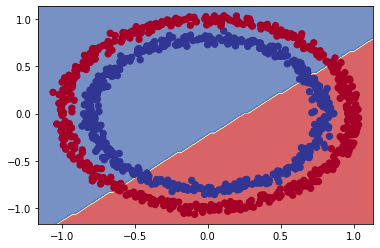

In [18]:
# check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [19]:
# let's see if our model can be used for a regression problem

tf.random.set_seed(42)

# create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100, 1100, 5) # y=x + 100

# split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

#fit our model to regression data

we compiled our model for a binary classification problem but we're now working on a regression problem, lets change the model to suit our data

In [20]:
# set up the random seed
tf.random.set_seed(42)

# 1. create the model
model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100, input_shape=([1])),
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])
# 2. compile the model, with a regression=specific function
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])
# 3. fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1),
            y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

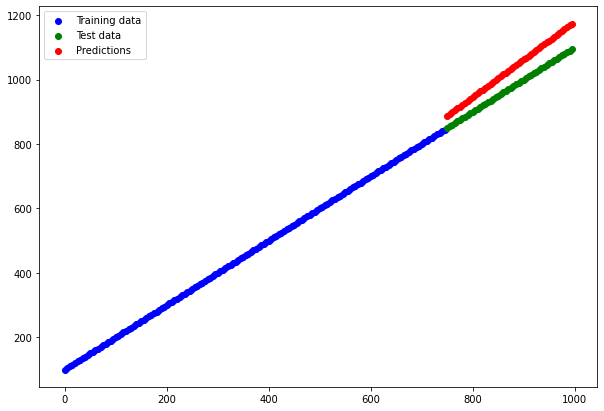

In [21]:
# make predictions with our trained model
y_reg_preds = model_3.predict(X_reg_test)

# plot the models predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

## The midding piece: non-linearity

# set the random seed
tf.random.set_seed(42)

# 1. create the model
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.linear, input_shape=(None,1))
               
])

# compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
# 3. fit the model
history = model_4.fit(tf.expand_dims(X, axis=-1),
            y,
            epochs=100)

In [22]:
#set the random_seed
tf.random.set_seed(42)

#1. create_the_model
model_4 = tf.keras.Sequential([ tf.keras.layers.Dense(1, activation=tf.keras.activations.linear, input_shape=(None,1))

])

#compile the_model
model_4.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(lr=0.001), metrics=["accuracy"])

#3. fit the model
history = model_4.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 4.2732 - accuracy: 0.4968
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1783 - accuracy: 0.4965
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1319 - accuracy: 0.4972
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0867 - accuracy: 0.4978
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0225 - accuracy: 0.4967
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9695 - accuracy: 0.4982
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9023 - accuracy: 0.4988
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8551 - accuracy: 0.4972
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8040 - accuracy: 0.4990
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7407 - accuracy: 0.5006
Epoch 11/100
32/32 [=

lets try build our first neural network with a non-linear activation function

In [23]:
# set random seed
tf.random.set_seed(42)

# 1. create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu, input_shape=(None,1))
])
# 2. compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
# 3. fit the model
history = model_5.fit(tf.expand_dims(X, axis=-1),
            y,
            epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 1ms/step - loss: 4.2732 - accuracy: 0.4968
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1783 - accuracy: 0.4965
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 4.1319 - accuracy: 0.4972
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0867 - accuracy: 0.4978
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0225 - accuracy: 0.4967
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9695 - accuracy: 0.4982
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9023 - accuracy: 0.4988
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8551 - accuracy: 0.4972
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8040 - accuracy: 0.4990
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7407 - accuracy: 0.5006
Epoch 11/100
32/32 [=

replicate the multi-layer nueral network from TF playground

In [24]:
# set the random seed
tf.random.set_seed(42)

# 1. create the model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1)
])
# 2. compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])
# 3. fit the model
history = model_6.fit(X, y, epochs=250, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [25]:
# evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

doing binary classification


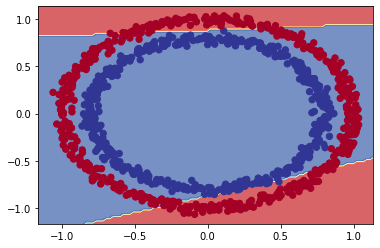

In [26]:
# How do our model predictions look
plot_decision_boundary(model_6, X, y)

In [27]:
# set random seed
tf.random.set_seed(42)

# 1. create the model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])
# compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])
#fit the model
model_7.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 0.6834 - accuracy: 0.5550
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.5630
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.5600
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.5960
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6553 - accuracy: 0.5850
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6386 - accuracy: 0.6360
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.6890
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5101 - accuracy: 0.8090
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8550
Epoch 11/100
32/32 [=

In [28]:
# evaluate our model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0279 - accuracy: 0.9900


[0.02788819745182991, 0.9900000095367432]

doing binary classification


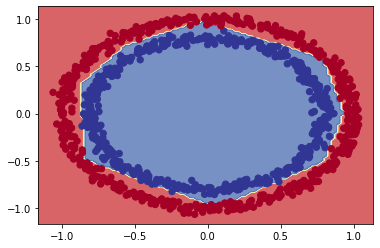

In [29]:
# visualize our metrics
plot_decision_boundary(model_7, X, y)

In [30]:
# create a toy tensor ( similar to the data we pass into our models)
A = tf.cast(tf.range(-10.0,10.0), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

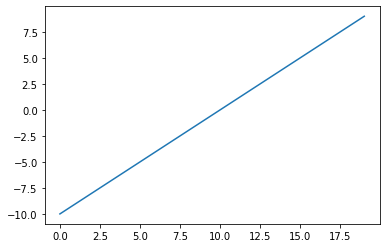

In [31]:
#visualize out toy tensor
plt.plot(A)

In [32]:
# lets start by replicating sigmoid - sigmoid(x) = 1 / 1 (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

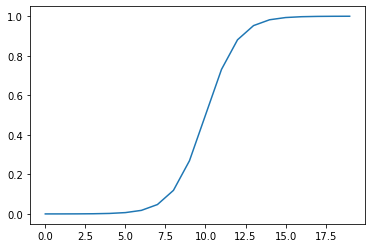

In [33]:
# plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [34]:
# let's create a relu function
def relu(x):
  return tf.maximum(0, x)

# pass our toy tensor to our relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

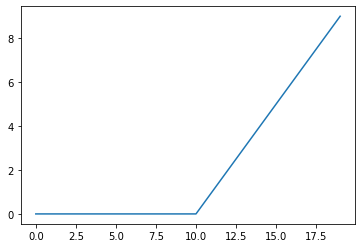

In [35]:
plt.plot(relu(A))

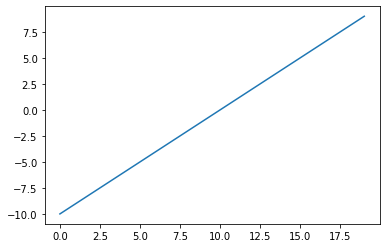

In [36]:
# linear activation function
plt.plot(tf.keras.activations.linear(A));

## Evaluating and improving our classification

so far we've been training and testing on the same data set however, in machine learning this is basically a sin.
so let's create a training set

In [37]:
# check how many examples we have
len(X)

1000

In [38]:
# split into trand and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [39]:
# let's recreate a model to fit on the training data and evaulate on the test data

#set random seed
tf.random.set_seed(42)

# 1. create the model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation= "sigmoid")
])
# compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])
# fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 3ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 3ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [===========

In [40]:
#evaluate the model on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849867582321, 1.0]

doing binary classification
doing binary classification


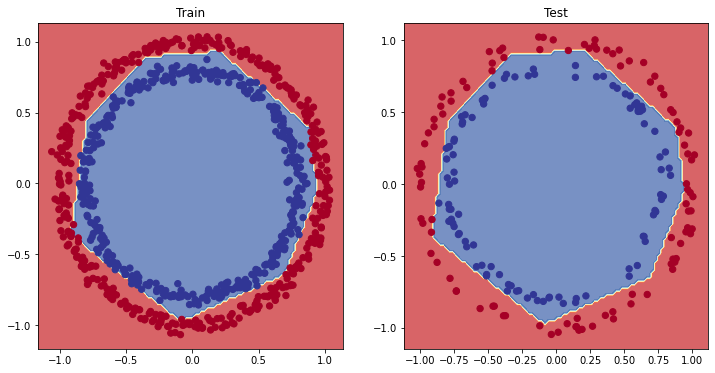

In [41]:
#plot the decision boundaries for the training and test set
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X_test, y=y_test)
plt.show()

## plot the loss (or training ) curve


In [42]:
# convert the history object into a DataFrame
pd.DataFrame(history.history) 

,loss,accuracy
0,0.684651,0.54250
1,0.677721,0.55250
2,0.673595,0.55125
3,0.668149,0.57750
4,0.663269,0.58500
5,0.654567,0.58375
6,0.641258,0.67500
7,0.626428,0.70125
8,0.603831,0.74875
9,0.571404,0.77375


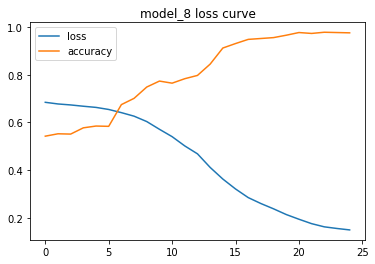

In [43]:
# plot the loss curve
pd.DataFrame(history.history).plot()
plt.title("model_8 loss curve");

**Note:** For many problems, the loss function going down means the model is improving ( the predictions its making are getting closer to the ground truth labels)

## Finding the best learning rate
To find the ideal learning rate ( the learning rate where the loss decreass the most during training) we're ing to use the following steps
* A learning rate **callback** - you can think of a callback as an extra piece of functionality, you can add to your *while* its training

*Another model ( we could use the same one as above, but we're practicing building models here)

* A modified loss curves plot

In [44]:
# set random seed
tf.random.set_seed(42)

#create the model
model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])
# compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])
#create a learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

#fit the model(passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_schedular])

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

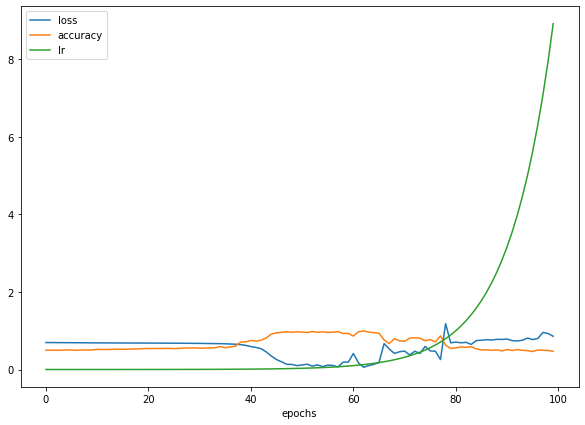

In [45]:
# checkout the historu
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="epochs");

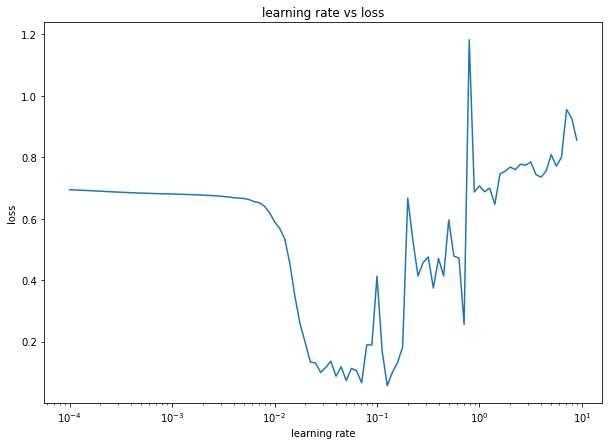

In [46]:
# plot the learning rate verse the loss
lrs = 1e-4 * (10 ** ( tf.range(100)/ 20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("learning rate vs loss");


In [47]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 10**-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [48]:
# let's try using a higher *ideal* learning rate with the same model
#set random seed
tf.random.set_seed(42)

# create the model
model_10 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])
#compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=.02),
                 metrics=["accuracy"])
#Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=20)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [===========

In [49]:
# evaluate model_10 on the test dataset
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

In [50]:
#evaluate model 8 on the test dataset
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.12468849867582321, 1.0]

doing binary classification
doing binary classification


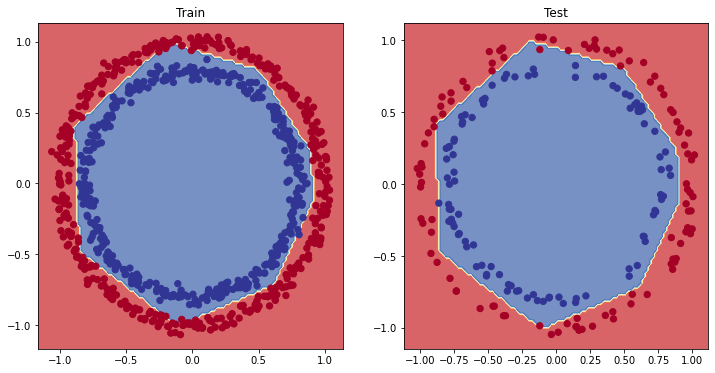

In [51]:
# plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_10, X_test, y_test)
plt.show()

## more classification evaluation methos
*Accuracy
*precision
*recall
*F1-score
*confusion matrix
*classification report from scikit-learn

In [52]:
# check the accuracy of our model
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.05740184709429741
Model accuracy on the test set: 99.00%


## how about a confusion matrix

In [53]:
# create a confision matrix
from sklearn.metrics import confusion_matrix

# make predictions
y_preds = model_10.predict(X_test)

# create confison matrix
confusion_matrix(y_test, y_preds)


ValueError: ignored

In [54]:
y_test[:10]

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [56]:
y_preds[:10]

array([[9.8526537e-01],
       [9.9923790e-01],
       [9.9032348e-01],
       [9.9706942e-01],
       [3.9622977e-01],
       [1.8126935e-02],
       [9.6829069e-01],
       [1.9746721e-02],
       [9.9967170e-01],
       [5.6460500e-04]], dtype=float32)

ooks like our predictions array has come out in **predictions probility** from the standard output from the sigmoid (or softmax) activation function

In [57]:
# convert prediction probabilities to binary format and view the first 10
tf.round(y_preds)[:10]

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.]], dtype=float32)>

In [58]:
# create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

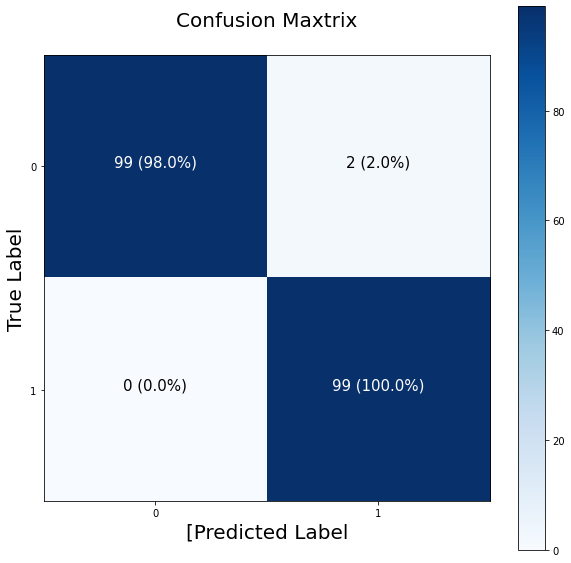

In [59]:
# note: the consfusionn matrix code we're about to write is a remix of scikit-learn's plot_confussion matrix

import itertools

figsize = (10,10)

#create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize out confusion matrix
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)
#create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

#create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

#label the axes
ax.set(title="Confusion Maxtrix",
       xlabel="[Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)
# set x=axis labels to the bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

#adject label size
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)
#set threshold for different colors
threshold = (cm.max() + cm.min()) / 2

#plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i ,j] > threshold else "black",
           size=15)



In [60]:
cm_norm

array([[0.98019802, 0.01980198],
       [0.        , 1.        ]])

# Working with a larger example (multiclass classification)

When you have more than two classes as an option, it's know as **multi-class classification**.

*this means if you have 3 different classes, it's multi-class classification

*it also means if you have 100 different classes, it's multi-class classification

to practice muli-class lassification, we're going to build a neural network to classify images of different items of clothing

In [61]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# the data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [62]:
# show the frst training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [63]:
#check the shape of a single example
train_data[0].shape, train_labels[0].shape

((28, 28), ())

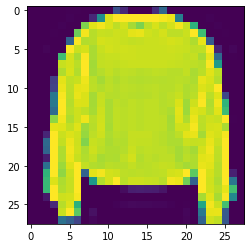

In [64]:
# plot a single sample
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [65]:
#check our samples label
train_labels[7]

2

In [66]:
# create a small list so we can index onto our training labels so tey're human-readable
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

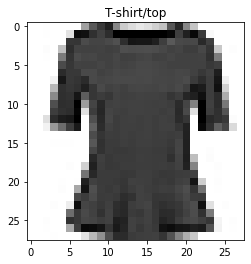

In [67]:
#plot an example image and its label
index_of_choice = 1013
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

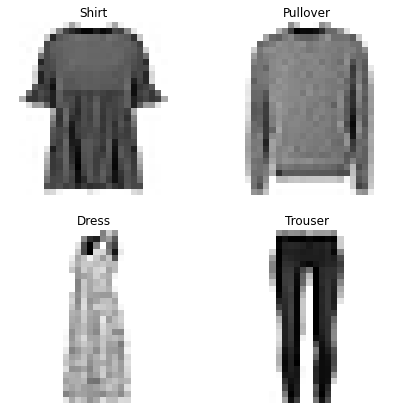

In [68]:
# plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7 ))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False )


##building a multi-class classification model

input_shape = 28x28 (the shape of one image)

out_putshape = 10 (one per class of clothing)

loss function = tf.keras.losses.

CategoricalCrosstentropy()

output layer activation = Softmax (not sigmoid )

if your labels are one-hot encoded, use CategoricalCrossentropy()

if your labels are integers use SparseCategoricalCrossentropy()

Output layer activation = softmax (not sigmoid)

In [69]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [70]:
from sklearn.utils.extmath import softmax
# set random seed
tf.random.set_seed(42)

#create the model
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),                          
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])
#compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
#fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [71]:
# check model summary
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 4)                 3140      
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [72]:
# check the min and max of training data
train_data.min(), train_data.max()

(0, 255)

Neural networks prefer data to be scaled ( or normalized), this means they like to have the numbers in the tensor between 0 & 1.

In [73]:
# we can get our training and testing data between 0 & 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

#check the min and max vales of the scaled training data
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [74]:
#build a model with normalized data
#set random seed
tf.random.set_seed(42)

#create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")

])
# compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
#fit the model
norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

**Note** Neural networks tend to prefer data in numerical form as well as scaled/normalized (numbers between 0 & 1 )

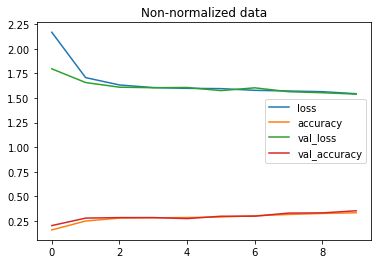

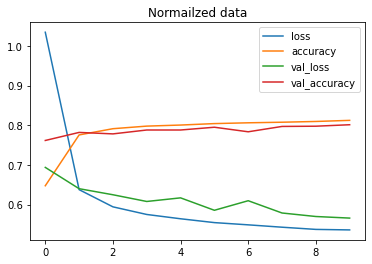

In [75]:
import pandas as pd
# plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized data")
#plot normalized data loss curve
pd.DataFrame(norm_history.history).plot(title="Normailzed data")

The same model with even slightly different data can produce dramatically different results. so when you're comparing models, it's import to make sure you're comparing them on the same criteria. (ex. same architecture but different data or same data but different architecture)

In [80]:
##Find the ideal learning rate
# create model
tf.random.set_seed(42)

model_13 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])
#compile the model
model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])
# create the learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20)),

#fit the model
find_ir_history = model_13.fit(train_data_norm,
                               train_labels,
                               epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_schedular])

Epoch 1/40
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

Text(0.5, 1.0, 'Finding the ideal learning rate')

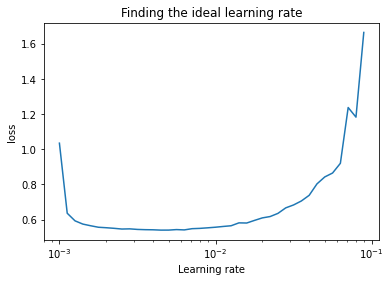

In [81]:
#plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_ir_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("loss")
plt.title("Finding the ideal learning rate")

In [83]:
# let's refit a model with the ideal learning rate

# set random seed
tf.random.set_seed(42)
#create a model
model_14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
# compile the model
model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(lr=0.001),
                 metrics=["accuracy"])
#fit the model
history_model_14 = model_14.fit(train_data_norm,
                                train_labels,
                                epochs=20,
                                validation_data=(test_data_norm, test_labels))

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evluating our multi_class classification model

To evaluate our multi-class classification model we could:

*Evaluate its performance using other classification metrics (such as a confusion matrix)

*Assess some of its predictions (through visualizations)

*improve its results (by training it for longer or changing the architecutre

*save and expor it for use in an application

Let's go through the top 2

In [97]:
# create a confusion metrix

import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_preds, classes=None, figsize=(10, 10), text_size=15):

#create the confusion matrix
  cm = confusion_matrix(y_true, y_preds)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize out confusion matrix
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  #create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  #set labels to be classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  #label the axes
  ax.set(title="Confusion Maxtrix",
         xlabel="[Predicted Label",
         ylabel="True Label",
         xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)
  # set x=axis labels to the bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #adject label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)
  #set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2

  #plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i ,j] > threshold else "black",
             size=text_size)


In [84]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'bag',
 'Ankle boot']

In [85]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [89]:
# make some predictions with our model
y_probs = model_14.predict(test_data_norm) #probs is short for predictions probabilities

# view the first 5 predictions
y_probs[:5]

array([[8.56299753e-11, 3.53615629e-13, 2.66337556e-05, 4.63562024e-08,
        5.09498605e-05, 9.61192474e-02, 8.17780403e-08, 9.18688551e-02,
        4.06052778e-03, 8.07873666e-01],
       [3.42785552e-06, 1.28992649e-16, 9.59891498e-01, 2.05162564e-07,
        1.53292371e-02, 2.45320095e-13, 2.41428725e-02, 1.13834485e-28,
        6.32718089e-04, 4.47896404e-08],
       [6.10630595e-05, 9.96576726e-01, 4.38669758e-08, 3.34058981e-03,
        1.32494861e-05, 1.43831603e-21, 8.27906115e-06, 7.32374630e-18,
        5.48116041e-08, 4.92251402e-14],
       [7.50314357e-05, 9.90536869e-01, 4.25285322e-07, 9.22318175e-03,
        1.36231421e-04, 1.82760903e-18, 2.68082422e-05, 4.81248308e-14,
        1.45215904e-06, 2.22114601e-11],
       [7.21899569e-02, 1.54957536e-06, 2.55668938e-01, 1.03631355e-02,
        4.35413495e-02, 1.10693023e-13, 6.16930187e-01, 6.75438989e-23,
        1.30491622e-03, 1.21404065e-09]], dtype=float32)

**Note** Remember to make predictions on the same kind of data your model was trained on ex: if your model was trained on ormalized data you'll want to make your predictions on normalized data'

In [88]:
test_data[:10], test_data_norm[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [92]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5629975e-11, 3.5361563e-13, 2.6633756e-05, 4.6356202e-08,
        5.0949860e-05, 9.6119247e-02, 8.1778040e-08, 9.1868855e-02,
        4.0605278e-03, 8.0787367e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [93]:
# convert all of the prediction probabilities into integers
y_preds = y_probs.argmax(axis=1)

#view the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [94]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [95]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

array([[696,   8,  25,  87,   9,   5, 160,   0,  10,   0],
       [  2, 939,   2,  35,   9,   0,  13,   0,   0,   0],
       [ 19,   2, 656,  10, 188,   0, 110,   0,  15,   0],
       [ 39,  10,  10, 819,  55,   0,  47,   1,  19,   0],
       [  0,   0,  95,  23, 800,   0,  73,   0,   7,   2],
       [  0,   0,   1,   0,   0, 894,   0,  60,   7,  38],
       [106,   4, 158,  57, 159,   1, 499,   0,  16,   0],
       [  0,   0,   0,   0,   0,  31,   0, 936,   0,  33],
       [  4,   1,  38,  15,   8,  12,   9,   5, 906,   2],
       [  0,   0,   1,   0,   2,  15,   0,  51,   1, 930]])

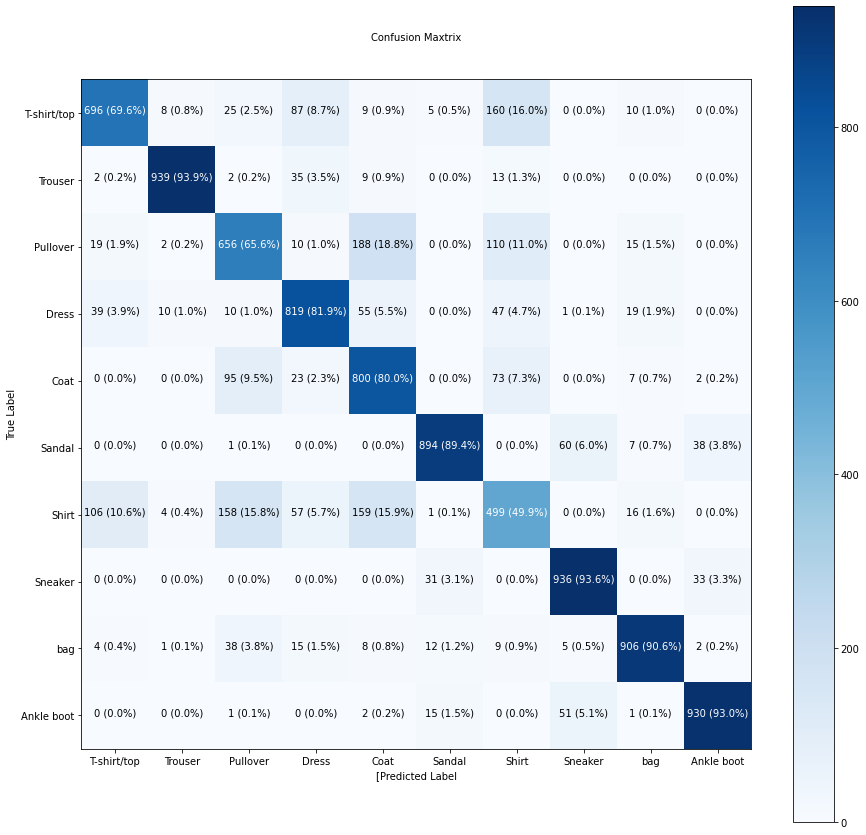

In [99]:
# make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_preds=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

**Note** often when working with images and other form of visual data, it's a good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models

create a function for

*plot a random image

*make a prediction on said image

*label the plot with the truth label & the predicted label


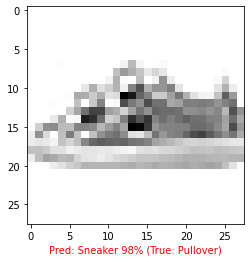

In [117]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  picks a random image, plots it and labels it with a prediction and truth label
  """
  i = random.randint(0, len(images))

  # create predictions and targets
  target_images = images[i]
  pred_probs = model.predict(target_images.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[1]]

  #plot the image
  plt.imshow(target_images, cmap=plt.cm.binary)

  #change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # and xlabel information (prediction/ true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) #set the color to green or red based on if prediction is right or wrong

  #check out a random imae as well as it prediction
plot_random_image(model=model_14,
                  images=test_data_norm, # always make predictions that your model was trained on
                  true_labels=test_labels,
                  classes=class_names)

## what patterns is our model learning?

In [118]:
# find the layers of our most recent model
model_14.layers

In [120]:
# extract a particular layer
model_14.layers[1]

In [122]:
#get the patterns of a layer in our network
weights, biases = model_14.layers[1].get_weights()
#shapes
weights, weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

# now let's check out the biases vector

In [123]:
# bias and biases shapes
biases, biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

# Every neuron has a bias vector. Each of these is paired with a weights matrix

the biases vector gets initalized as zeros ( at least in the case of TF dense layer)

The biases vector dictates how much the pattern within the corresponding weights matrix should influence the next layer

In [124]:
model_14.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_47 (Dense)            (None, 4)                 3140      
                                                                 
 dense_48 (Dense)            (None, 4)                 20        
                                                                 
 dense_49 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


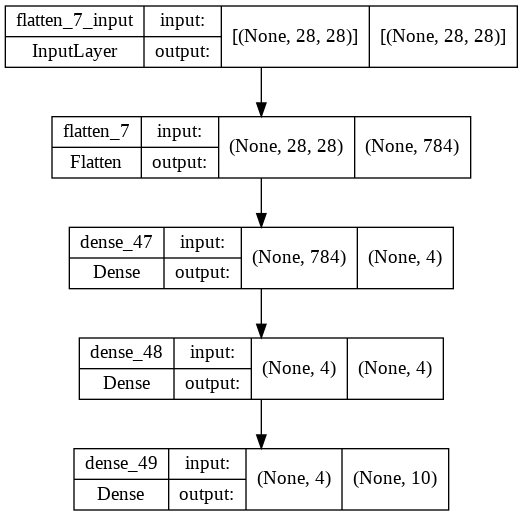

In [125]:
# another way to view our deep learning models
from tensorflow.keras.utils import plot_model
#see the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)